In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [18]:
df = pd.read_csv('Chip_Quality')
df.head()

,a,b,p
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [19]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


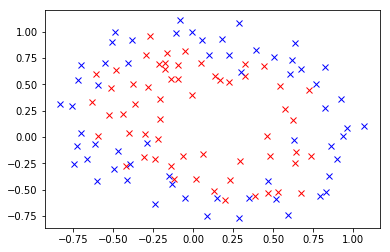

In [20]:
#Plot of the data points
x = df[['c1','c2']] 
#x = (x-x.mean())/x.std()
y = df['res']
for i in range(x.shape[0]):
    if y[i]==1:
        plt.plot(x.iloc[i][0],x.iloc[i][1],'rx')
        #print("Aa")
    else:
        
        plt.plot(x.iloc[i][0],x.iloc[i][1],'bx')
plt.show()

The plot shows that we require some higher order polynomial features to fit a good decision boundary.

In [21]:
x1 = np.multiply(df['c1'],df['c1'])
x1 = np.array(x1)
x1 = np.reshape(x1,(x1.shape[0],1))
x2 = np.multiply(df['c2'],df['c2'])
x2 = np.array(x2)
x2 = np.reshape(x2,(x2.shape[0],1))
df = df.assign(c3=x1, c4 = x2)
df.head()

,c1,c2,res,c3,c4
0,0.051267,0.69956,1,0.002628,0.489384
1,-0.092742,0.68494,1,0.008601,0.469143
2,-0.213710,0.69225,1,0.045672,0.479210
3,-0.375000,0.50219,1,0.140625,0.252195
4,-0.513250,0.46564,1,0.263426,0.216821


In [22]:
df.shape

(118, 5)

In [23]:
df.describe(include='all')

,c1,c2,res,c3,c4
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525,0.247575,0.301370
std,0.496654,0.519743,0.502060,0.248532,0.284536
min,-0.830070,-0.769740,0.000000,0.000040,0.000026
25%,-0.372120,-0.254385,0.000000,0.043243,0.061086
50%,-0.006336,0.213455,0.000000,0.165397,0.252195
75%,0.478970,0.646562,1.000000,0.389925,0.464189
max,1.070900,1.108900,1.000000,1.146827,1.229659


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
c1     118 non-null float64
c2     118 non-null float64
res    118 non-null int64
c3     118 non-null float64
c4     118 non-null float64
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [25]:
df.corr()

,c1,c2,res,c3,c4
c1,1.000000,-0.138709,-0.074115,0.378070,-0.007324
c2,-0.138709,1.000000,0.005697,-0.114382,0.594471
res,-0.074115,0.005697,1.000000,-0.389963,-0.247882
c3,0.378070,-0.114382,-0.389963,1.000000,-0.344834
c4,-0.007324,0.594471,-0.247882,-0.344834,1.000000


In [26]:
df['c1'] = (df['c1']-df['c1'].mean())/df['c1'].std()
df['c2'] = (df['c2']-df['c2'].mean())/df['c2'].std()
df['c3'] = (df['c3']-df['c3'].mean())/df['c3'].std()
df['c4'] = (df['c4']-df['c4'].mean())/df['c4'].std()
x = df[['c1','c2','c3','c4']] 
#x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))

In [27]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (82, 4)
y.shape: (82,)
m: 82
n: 4
x.shape after appending a column for bias: (82, 5)


In [28]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[ 0.77856559],
        [ 0.37644399],
        [ 0.7573729 ],
        [-0.09481703],
        [ 0.33264235]]), (5, 1))

In [29]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
y.shape

(82, 1)

In [30]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

0.9588160531121214

In [31]:
alpha = 0.001 # Learning rate
log = np.array([])
while(alpha<1):
    J_prev = 100
    J=0
    iterations = 0
    w = np.zeros((n+1,1))
    temp = np.zeros((n+1,1))
    while(abs(J_prev-J) > 0.0000001):
        z = np.matmul(x,w)
        h = 1/(1 + np.exp(-z))
        for i in range(n+1):
            temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
        for i in range(n+1):
            w[i,:] = temp[i]
        #print(w)
        #print(np.matmul(h-y,(h-y).T))
        J_prev = J
        w1 = np.log(1/(1 + np.exp(-z)))
        w2 = np.log(1-(1/(1 + np.exp(-z))))
        J = (-1/m)*np.sum(y*w1 + (1-y)*w2)
        #print(J)
        if(alpha == 0.001):
            log = np.append(log, J)
        iterations+=1
    if(alpha == 0.001):
        it = np.arange(iterations)
    z = np.matmul(X_test,w)
    y_pred = 1/(1 + np.exp(-z))
    i=0
    cnt=0
    for i in range(X_test.shape[0]):
        if( abs(y_pred[i] - y_test[i]) < 0.5):
            cnt = cnt+1
    accuracy = (cnt/y_test.shape[0])*100
    print("alpha = ",alpha," cost = ",J," iterations = ",iterations," accuracy = ",accuracy)
    alpha =alpha*10

alpha =  0.001  cost =  0.41088081613647137  iterations =  78043  accuracy =  75.0
alpha =  0.01  cost =  0.40869260389352774  iterations =  13567  accuracy =  77.77777777777779
alpha =  0.1  cost =  0.40844662718648994  iterations =  1992  accuracy =  77.77777777777779


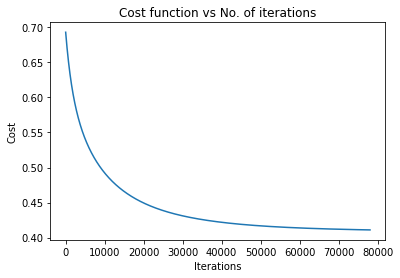

In [32]:
# plot for alpha = 0.001
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

# Using Regularisation

In [33]:
df.head()

,c1,c2,res,c3,c4
0,-0.007071,0.993681,1,-0.985574,0.660775
1,-0.297030,0.965551,1,-0.961542,0.589637
2,-0.540596,0.979616,1,-0.812383,0.625018
3,-0.865349,0.613935,1,-0.430328,-0.172824
4,-1.143712,0.543612,1,0.063775,-0.297147


In [34]:
df['c1'] = (df['c1']-df['c1'].mean())/df['c1'].std()
df['c2'] = (df['c2']-df['c2'].mean())/df['c2'].std()
df['c3'] = (df['c3']-df['c3'].mean())/df['c3'].std()
df['c4'] = (df['c4']-df['c4'].mean())/df['c4'].std()
x = df[['c1','c2','c3','c4']] 
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
print(X_test.shape)
print(y_test.shape)

(36, 5)
(36, 1)


In [35]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (82, 4)
y.shape: (82,)
m: 82
n: 4
x.shape after appending a column for bias: (82, 5)


In [36]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[-1.01387703],
        [ 0.01722027],
        [-0.25741158],
        [ 0.15078967],
        [ 0.63660234]]), (5, 1))

In [37]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [38]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

0.9171574163347939

In [39]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
#log = np.array([])
while(alpha < 1):
    lamda = 10
    while(lamda < 1001):
        w = np.zeros((n+1,1))
        J_prev = 100
        J=0
        iterations = 0
        while(abs(J_prev-J) > 0.000001):
            z = np.matmul(x,w)
            h = 1/(1 + np.exp(-z))
            for i in range(n+1):
                temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0)) - alpha*lamda*(1/m)*w[i,:]
            for i in range(n+1):
                w[i,:] = temp[i]
            J_prev = J
            w1 = np.log(1/(1 + np.exp(-z)))
            w2 = np.log(1-(1/(1 + np.exp(-z))))
            J = (-1/m)*np.sum(y*w1 + (1-y)*w2) + (1/(2*m))*lamda*np.sum(np.multiply(w,w))
            #print(w)
            #print(np.matmul(h-y,(h-y).T))
            #if(lamda == 1000):
            #    log = np.append(log, J)
            iterations+=1
        z = np.matmul(X_test,w)
        y_pred = 1/(1 + np.exp(-z))
        i=0
        cnt=0
        for i in range(X_test.shape[0]):
            if( abs(y_pred[i] - y_test[i]) < 0.5):
                cnt = cnt+1
        accuracy = (cnt/y_test.shape[0])*100
        print("alpha = ",alpha," lamda = ",lamda," iterations = ",iterations," cost = ",J,"accuracy = ",accuracy)
        lamda = lamda*10
    print("___________________")
    alpha = alpha*10

alpha =  0.001  lamda =  10  iterations =  8360  cost =  0.5931723928887539 accuracy =  75.0
alpha =  0.001  lamda =  100  iterations =  1438  cost =  0.6724202731133694 accuracy =  72.22222222222221
alpha =  0.001  lamda =  1000  iterations =  169  cost =  0.6907309823508432 accuracy =  69.44444444444444
___________________
alpha =  0.01  lamda =  10  iterations =  1446  cost =  0.590831727839929 accuracy =  77.77777777777779
alpha =  0.01  lamda =  100  iterations =  237  cost =  0.6721021365451532 accuracy =  72.22222222222221
alpha =  0.01  lamda =  1000  iterations =  36  cost =  0.6906937750704334 accuracy =  69.44444444444444
___________________
alpha =  0.1  lamda =  10  iterations =  221  cost =  0.5905968058370411 accuracy =  77.77777777777779
alpha =  0.1  lamda =  100  iterations =  46  cost =  0.6720642732639192 accuracy =  72.22222222222221
alpha =  0.1  lamda =  1000  iterations =  9  cost =  0.6906879389452684 accuracy =  69.44444444444444
___________________


# Conclusion

Minimum cost that we are getting is 0.59580 for alpha = 0.1 and lamda = 10.
However cost for alpha=0.001 and alpha=0.01 for lamda = 10 is also approx 0.59.
Therefore we can deduct that cost is lesser for lamda = 10 as compared to lamda = 100 and 1000.
This means that higher value of lamda is underfitting our model.